# Clustering
## Questão 1
### Primeiro, queremos agrupar nossos super-heróis de acordo com seus poderes e informações. Execute um método de cluster não supervisionado usando o número de clusters que você julgar mais apropriado.

### 1. Qual algoritmo você escolheu e por quê?

Escolhi o algoritmo k-means porque esta questão solicita um algoritmo não supervisionado.
O algoritmo k-means é uma solução indicada para classificação não supervisionada quando precisamos descobrir insights de dados não rotulados.

In [106]:
# Instalando as bibliotecas necessárias para as análises
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import statistics

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### 2. Quais recursos você usou e por quê? Explique qualquer pré-processamento ou engenharia de recursos (seleção) que você executou.

A sequência de trabalho que utilizarei:
- Lerei as duas bases de dados;
- Verificarei quais os registros vazios em cada base;
- Os registros vazios que totalizarem até 10% do total dos registros serão substituidos pelo valor da moda (para variáveis qualitativas) ou pelo valor da mediana (para variáveis quantitativas);
- Aplicarei o comando "merge" para unir as duas bases de dados.

## Pré-processamento dos dados

In [110]:
# Lendo a base de dados "super_hero_powers"
df_power = pd.read_csv('super_hero_powers.csv')
df_power.head()

hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0      3-D Man     True                False               False   
1       A-Bomb    False                 True               False   
2   Abe Sapien     True                 True               False   
3     Abin Sur    False                False                True   
4  Abomination    False                 True               False   

   Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                  False            False       False    False   
1                  False            False        True    False   
2                  False             True        True    False   
3                  False            False       False    False   
4                  False            False       False    False   

   Energy Absorption  Flight  ...  Web Creation  Reality Warping  Odin Force  \
0              False   False  ...         False            False       False   
1              False   False  ...         False            False       False   
2              False   False  ...         False            False       False   
3              False   False  ...         False            False       False   
4              False   False  ...         False            False       False   

   Symbiote Costume  Speed Force  Phoenix Force  Molecular Dissipation  \
0             False        False          False                  False   
1             False        False          False                  False   
2             False        False          False                  False   
3             False        False          False                  False   
4             False        False          False                  False   

   Vision - Cryo  Omnipresent  Omniscient  
0          False        False       False  
1          False        False       False  
2          False        False       False  
3          False        False       False  
4          False        False       False  

[5 rows x 168 columns]

In [111]:
# Analisando o tamanho da base de dados "super_hero_powers" e os tipos de variáveis
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [112]:
# Verificando se '-' está contido no dataframe
resultado = df_power.isin(['-'])

In [113]:
# Excluindo os registros duplicados
resultado.drop_duplicates()

hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0       False    False                False               False   

   Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                  False            False       False    False   

   Energy Absorption  Flight  ...  Web Creation  Reality Warping  Odin Force  \
0              False   False  ...         False            False       False   

   Symbiote Costume  Speed Force  Phoenix Force  Molecular Dissipation  \
0             False        False          False                  False   

   Vision - Cryo  Omnipresent  Omniscient  
0          False        False       False  

[1 rows x 168 columns]

O resultado acima nos informa que não há células vazias no dataframe df_power

In [115]:
# Lendo a base de dados "heroes_information"
df_information = pd.read_csv('heroes_information.csv')
df_information.head()

Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4   -99.0      Marvel Comics          -       bad   -99.0

In [116]:
# Analisando o tamanho da base de dados "heroes_information" e os tipos de variáveis
df_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [117]:
# Excluindo a coluna "Unnamed: 0" da base de dados
df_information = df_information.drop(columns=['Unnamed: 0'])

In [118]:
# Renomeando a variável "name" da base de dados "df_information"
df_information.rename(columns={"name": "hero_names"}, inplace=True)
df_information.head()

hero_names Gender Eye color               Race Hair color  Height  \
0       A-Bomb   Male    yellow              Human    No Hair   203.0   
1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   191.0   
2     Abin Sur   Male      blue            Ungaran    No Hair   185.0   
3  Abomination   Male     green  Human / Radiation    No Hair   203.0   
4      Abraxas   Male      blue      Cosmic Entity      Black   -99.0   

           Publisher Skin color Alignment  Weight  
0      Marvel Comics          -      good   441.0  
1  Dark Horse Comics       blue      good    65.0  
2          DC Comics        red      good    90.0  
3      Marvel Comics          -       bad   441.0  
4      Marvel Comics          -       bad   -99.0

In [119]:
# Contagem dos valores únicos para a variável "Gender"
df_information['Gender'].value_counts()

Gender
Male      505
Female    200
-          29
Name: count, dtype: int64

In [120]:
# Substituindo os valores "-" pelo valor da moda "Male"
df_information['Gender'] = df_information['Gender'].replace(['-'], 'Male')

# Contagem dos valores únicos para a variável "Gender"
df_information['Gender'].value_counts()

Gender
Male      534
Female    200
Name: count, dtype: int64

In [121]:
# Contagem dos valores únicos para a variável "Eye color"
df_information['Eye color'].value_counts()

Eye color
blue                       225
-                          172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
grey                         6
hazel                        6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
white / red                  1
yellow / blue                1
indigo                       1
silver                       1
green / blue                 1
blue / white                 1
yellow / red                 1
bown                         1
Name: count, dtype: int64

In [122]:
# Contagem dos valores únicos para a variável "Race"
df_information['Race'].value_counts()

Race
-                    304
Human                208
Mutant                63
God / Eternal         14
Human / Radiation     11
                    ... 
Gorilla                1
Rodian                 1
Flora Colossus         1
Human-Vuldarian        1
Yoda's species         1
Name: count, Length: 62, dtype: int64

In [123]:
# Contagem dos valores únicos para a variável "Hair color"
df_information['Hair color'].value_counts()

Hair color
-                   172
Black               158
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Silver                4
Brown / White         4
blond                 3
black                 3
Blue                  3
Orange                2
Yellow                2
Indigo                1
Brownn                1
Red / White           1
Red / Orange          1
Gold                  1
Magenta               1
Orange / White        1
Red / Grey            1
Brown / Black         1
Pink                  1
Black / Blue          1
Name: count, dtype: int64

In [124]:
# Substituindo os valores "-" pelo valor da moda "Black"
df_information['Hair color'] = df_information['Hair color'].replace(['-'], 'Black')

# Contagem dos valores únicos para a variável "Hair color"
df_information['Hair color'].value_counts()

Hair color
Black               330
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Silver                4
Brown / White         4
blond                 3
black                 3
Blue                  3
Orange                2
Yellow                2
Indigo                1
Brownn                1
Red / White           1
Red / Orange          1
Gold                  1
Magenta               1
Orange / White        1
Red / Grey            1
Brown / Black         1
Pink                  1
Black / Blue          1
Name: count, dtype: int64

In [125]:
# Contagem dos valores únicos para a variável "Height"
df_information['Height'].value_counts()

Height
-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
 185.0     35
 175.0     34
 168.0     29
 170.0     26
 165.0     26
 191.0     21
 193.0     21
 198.0     18
 173.0     17
 201.0     11
 196.0     11
 163.0      8
 213.0      7
 211.0      5
 157.0      5
 203.0      5
 244.0      4
 155.0      3
 226.0      3
 229.0      3
 218.0      3
 30.5       2
 122.0      2
 279.0      2
 137.0      2
 305.0      2
 206.0      2
 366.0      2
 234.0      1
 304.8      1
 160.0      1
 140.0      1
 15.2       1
 297.0      1
 64.0       1
 71.0       1
 287.0      1
 257.0      1
 79.0       1
 259.0      1
 701.0      1
 108.0      1
 62.5       1
 876.0      1
 142.0      1
 975.0      1
 267.0      1
 61.0       1
 66.0       1
Name: count, dtype: int64

In [126]:
# Contagem dos valores únicos para a variável "Publisher"
df_information['Publisher'].value_counts()

Publisher
Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64

In [127]:
# Substituindo os valores "nan" pelo valor da moda
df_information['Publisher'] = df_information['Publisher'].fillna('Marvel Comics')

# Contagem dos valores únicos para a variável "Publisher"
df_information['Publisher'].value_counts()

Publisher
Marvel Comics        403
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64

In [128]:
# Contagem dos valores únicos para a variável "Skin color"
df_information['Skin color'].value_counts()

Skin color
-                 662
green              21
red                 9
blue                9
white               7
grey                5
silver              5
purple              3
gold                3
yellow              2
pink                2
red / black         1
black               1
orange / white      1
gray                1
blue-white          1
orange              1
Name: count, dtype: int64

In [129]:
# Contagem dos valores únicos para a variável "Alignment"
df_information['Alignment'].value_counts()

Alignment
good       496
bad        207
neutral     24
-            7
Name: count, dtype: int64

In [130]:
# Substituindo os valores "-" pelo valor da moda "good"
df_information['Alignment'] = df_information['Alignment'].replace(['-'], 'good')

# Contagem dos valores únicos para a variável "Gender"
df_information['Alignment'].value_counts()

Alignment
good       503
bad        207
neutral     24
Name: count, dtype: int64

In [131]:
# Contagem dos valores únicos para a variável "Weight"
df_information['Weight'].value_counts()

Weight
-99.0     237
 54.0      23
 79.0      23
 81.0      22
 90.0      19
         ... 
 119.0      1
 48.0       1
 4.0        1
 115.0      1
 17.0       1
Name: count, Length: 135, dtype: int64

In [132]:
# Substituindo os valores "nan" pelo valor da mediana
df_information['Weight'] = df_information['Weight'].fillna(df_information['Weight'].median())

# Contagem dos valores únicos para a variável "Weight"
df_information['Weight'].value_counts()

Weight
-99.0     237
 54.0      23
 79.0      23
 81.0      22
 90.0      19
         ... 
 119.0      1
 48.0       1
 4.0        1
 115.0      1
 17.0       1
Name: count, Length: 135, dtype: int64

#### A quantidade de valores "-" nas variáveis "Eye color", "Race" e "Skin color" são superiores a 10% do total de registros, portanto excluiremos essas variáveis da base de dados

In [134]:
# Excluindo as variáveis "Eye color", "Race" e "Skin color" da base de dados
df_information = df_information.drop(['Eye color', 'Race', 'Skin color'], axis=1)

In [135]:
# Analisando o tamanho da base de dados "heroes_information" e os tipos de variáveis
df_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hero_names  734 non-null    object 
 1   Gender      734 non-null    object 
 2   Hair color  734 non-null    object 
 3   Height      734 non-null    float64
 4   Publisher   734 non-null    object 
 5   Alignment   734 non-null    object 
 6   Weight      734 non-null    float64
dtypes: float64(2), object(5)
memory usage: 40.3+ KB


In [136]:
# Unindo os dataframes "df_power" e "df_information" pela variável "hero_names"
df_total = pd.merge(df_power, df_information)

# Visualizando o dataframe total
df_total

hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0             A-Bomb    False                 True               False   
1         Abe Sapien     True                 True               False   
2           Abin Sur    False                False                True   
3        Abomination    False                 True               False   
4            Abraxas    False                False               False   
..               ...      ...                  ...                 ...   
655  Yellowjacket II    False                False               False   
656             Ymir    False                False               False   
657             Yoda     True                False               False   
658          Zatanna    False                False               False   
659             Zoom    False                False               False   

     Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                    False            False        True    False   
1                    False             True        True    False   
2                    False            False       False    False   
3                    False            False       False    False   
4                     True            False       False    False   
..                     ...              ...         ...      ...   
655                  False            False       False    False   
656                  False             True        True    False   
657                  False            False       False     True   
658                  False            False       False    False   
659                  False            False       False    False   

     Energy Absorption  Flight  ...  Molecular Dissipation  Vision - Cryo  \
0                False   False  ...                  False          False   
1                False   False  ...                  False          False   
2                False   False  ...                  False          False   
3                False   False  ...                  False          False   
4                False    True  ...                  False          False   
..                 ...     ...  ...                    ...            ...   
655              False    True  ...                  False          False   
656              False   False  ...                  False          False   
657              False   False  ...                  False          False   
658              False   False  ...                  False          False   
659              False   False  ...                  False          False   

     Omnipresent  Omniscient  Gender        Hair color  Height  \
0          False       False    Male           No Hair   203.0   
1          False       False    Male           No Hair   191.0   
2          False       False    Male           No Hair   185.0   
3          False       False    Male           No Hair   203.0   
4          False       False    Male             Black   -99.0   
..           ...         ...     ...               ...     ...   
655        False       False  Female  Strawberry Blond   165.0   
656        False       False    Male           No Hair   304.8   
657        False       False    Male             White    66.0   
658        False       False  Female             Black   170.0   
659        False       False    Male             Brown   185.0   

             Publisher  Alignment  Weight  
0        Marvel Comics       good   441.0  
1    Dark Horse Comics       good    65.0  
2            DC Comics       good    90.0  
3        Marvel Comics        bad   441.0  
4        Marvel Comics        bad   -99.0  
..                 ...        ...     ...  
655      Marvel Comics       good    52.0  
656      Marvel Comics       good   -99.0  
657       George Lucas       good    17.0  
658          DC Comics       good    57.0  
659          DC Comics        bad    81.0  

[660 rows x 174 columns]

In [137]:
# Analisando o tamanho da base de dados "df_total" e os tipos de variáveis
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Columns: 174 entries, hero_names to Weight
dtypes: bool(167), float64(2), object(5)
memory usage: 143.9+ KB


In [138]:
# Substituindo os valores "Male" pelo valor "1" e "Female" pelo valor "0"
df_total['Gender'] = df_total['Gender'].replace('Male',1)
df_total['Gender'] = df_total['Gender'].replace('Female',0)

In [139]:
# Contagem dos valores únicos para a variável Hair color
df_total['Hair color'].value_counts()

Hair color
Black               283
Blond                88
Brown                82
No Hair              69
Red                  49
White                22
Auburn               13
Green                 8
Strawberry Blond      6
Purple                5
Grey                  4
Silver                4
Brown / White         4
blond                 3
black                 3
Blue                  3
Orange                2
Indigo                1
Brownn                1
Red / White           1
Red / Orange          1
Gold                  1
Magenta               1
Yellow                1
Orange / White        1
Red / Grey            1
Brown / Black         1
Pink                  1
Black / Blue          1
Name: count, dtype: int64

In [140]:
# Transformando a variável Hair color
df_total['Hair color'] = df_total['Hair color'].replace('Black',1)
df_total['Hair color'] = df_total['Hair color'].replace('Blond',2)
df_total['Hair color'] = df_total['Hair color'].replace('Brown',3)
df_total['Hair color'] = df_total['Hair color'].replace('No Hair',4)
df_total['Hair color'] = df_total['Hair color'].replace('Red',5)
df_total['Hair color'] = df_total['Hair color'].replace('White',6)
df_total['Hair color'] = df_total['Hair color'].replace('Auburn',7)
df_total['Hair color'] = df_total['Hair color'].replace('Green',8)
df_total['Hair color'] = df_total['Hair color'].replace('Strawberry Blond',9)
df_total['Hair color'] = df_total['Hair color'].replace('Purple',10)
df_total['Hair color'] = df_total['Hair color'].replace('Grey',11)
df_total['Hair color'] = df_total['Hair color'].replace('Silver',12)
df_total['Hair color'] = df_total['Hair color'].replace('Brown / White',13)
df_total['Hair color'] = df_total['Hair color'].replace('Blue',14)
df_total['Hair color'] = df_total['Hair color'].replace('Orange',15)
df_total['Hair color'] = df_total['Hair color'].replace('Indigo',16)
df_total['Hair color'] = df_total['Hair color'].replace('Red / White',17)
df_total['Hair color'] = df_total['Hair color'].replace('Red / Orange',18)
df_total['Hair color'] = df_total['Hair color'].replace('Gold',19)
df_total['Hair color'] = df_total['Hair color'].replace('Magenta',20)
df_total['Hair color'] = df_total['Hair color'].replace('Yellow',21)
df_total['Hair color'] = df_total['Hair color'].replace('Orange / White',22)
df_total['Hair color'] = df_total['Hair color'].replace('Red / Grey',23)
df_total['Hair color'] = df_total['Hair color'].replace('Brown / Black',24)
df_total['Hair color'] = df_total['Hair color'].replace('Pink',25)
df_total['Hair color'] = df_total['Hair color'].replace('Black / Blue',26)
df_total['Hair color'] = df_total['Hair color'].replace('blond',2)
df_total['Hair color'] = df_total['Hair color'].replace('black',1)
df_total['Hair color'] = df_total['Hair color'].replace('Black / Blue',26)
df_total['Hair color'] = df_total['Hair color'].replace('Brownn',3)

In [141]:
# Contagem dos valores únicos para a variável Publisher
df_total['Publisher'].value_counts()

Publisher
Marvel Comics        354
DC Comics            196
Dark Horse Comics     18
NBC - Heroes          18
Image Comics          14
George Lucas          13
Star Trek              6
SyFy                   5
Team Epic TV           5
Shueisha               4
IDW Publishing         4
ABC Studios            4
Icon Comics            4
HarperCollins          3
Wildstorm              3
South Park             1
Universal Studios      1
Hanna-Barbera          1
Sony Pictures          1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64

In [142]:
# Transformando a variável Publisher
df_total['Publisher'] = df_total['Publisher'].replace('Marvel Comics',1)
df_total['Publisher'] = df_total['Publisher'].replace('DC Comics',2)
df_total['Publisher'] = df_total['Publisher'].replace('Dark Horse Comics',3)
df_total['Publisher'] = df_total['Publisher'].replace('NBC - Heroes',4)
df_total['Publisher'] = df_total['Publisher'].replace('Image Comics',5)
df_total['Publisher'] = df_total['Publisher'].replace('George Lucas',6)
df_total['Publisher'] = df_total['Publisher'].replace('Star Trek',7)
df_total['Publisher'] = df_total['Publisher'].replace('SyFy',8)
df_total['Publisher'] = df_total['Publisher'].replace('Team Epic TV',9)
df_total['Publisher'] = df_total['Publisher'].replace('Shueisha',10)
df_total['Publisher'] = df_total['Publisher'].replace('IDW Publishing',11)
df_total['Publisher'] = df_total['Publisher'].replace('ABC Studios',12)
df_total['Publisher'] = df_total['Publisher'].replace('Icon Comics',13)
df_total['Publisher'] = df_total['Publisher'].replace('HarperCollins',14)
df_total['Publisher'] = df_total['Publisher'].replace('Wildstorm',15)
df_total['Publisher'] = df_total['Publisher'].replace('South Park',16)
df_total['Publisher'] = df_total['Publisher'].replace('Universal Studios',17)
df_total['Publisher'] = df_total['Publisher'].replace('Hanna-Barbera',18)
df_total['Publisher'] = df_total['Publisher'].replace('Sony Pictures',19)
df_total['Publisher'] = df_total['Publisher'].replace('J. K. Rowling',20)
df_total['Publisher'] = df_total['Publisher'].replace('Titan Books',21)
df_total['Publisher'] = df_total['Publisher'].replace('Rebellion',22)
df_total['Publisher'] = df_total['Publisher'].replace('Microsoft',23)
df_total['Publisher'] = df_total['Publisher'].replace('J. R. R. Tolkien',24)

In [143]:
# Contagem dos valores únicos para a variável Alignment
df_total['Alignment'].value_counts()

Alignment
good       442
bad        194
neutral     24
Name: count, dtype: int64

In [144]:
# Transformando a variável Alignment
df_total['Alignment'] = df_total['Alignment'].replace('good',1)
df_total['Alignment'] = df_total['Alignment'].replace('bad',2)
df_total['Alignment'] = df_total['Alignment'].replace('neutral',3)

In [145]:
# Transformando as respostas "True" para "1" e "False" para "0" nas variáveis booleanas
df_total = df_total.replace({True: 1, False: 0})

In [146]:
df_total

hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0             A-Bomb        0                    1                   0   
1         Abe Sapien        1                    1                   0   
2           Abin Sur        0                    0                   1   
3        Abomination        0                    1                   0   
4            Abraxas        0                    0                   0   
..               ...      ...                  ...                 ...   
655  Yellowjacket II        0                    0                   0   
656             Ymir        0                    0                   0   
657             Yoda        1                    0                   0   
658          Zatanna        0                    0                   0   
659             Zoom        0                    0                   0   

     Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                        0                0           1        0   
1                        0                1           1        0   
2                        0                0           0        0   
3                        0                0           0        0   
4                        1                0           0        0   
..                     ...              ...         ...      ...   
655                      0                0           0        0   
656                      0                1           1        0   
657                      0                0           0        1   
658                      0                0           0        0   
659                      0                0           0        0   

     Energy Absorption  Flight  ...  Molecular Dissipation  Vision - Cryo  \
0                    0       0  ...                      0              0   
1                    0       0  ...                      0              0   
2                    0       0  ...                      0              0   
3                    0       0  ...                      0              0   
4                    0       1  ...                      0              0   
..                 ...     ...  ...                    ...            ...   
655                  0       1  ...                      0              0   
656                  0       0  ...                      0              0   
657                  0       0  ...                      0              0   
658                  0       0  ...                      0              0   
659                  0       0  ...                      0              0   

     Omnipresent  Omniscient  Gender  Hair color  Height  Publisher  \
0              0           0       1           4   203.0          1   
1              0           0       1           4   191.0          3   
2              0           0       1           4   185.0          2   
3              0           0       1           4   203.0          1   
4              0           0       1           1   -99.0          1   
..           ...         ...     ...         ...     ...        ...   
655            0           0       0           9   165.0          1   
656            0           0       1           4   304.8          1   
657            0           0       1           6    66.0          6   
658            0           0       0           1   170.0          2   
659            0           0       1           3   185.0          2   

     Alignment  Weight  
0            1   441.0  
1            1    65.0  
2            1    90.0  
3            2   441.0  
4            2   -99.0  
..         ...     ...  
655          1    52.0  
656          1   -99.0  
657          1    17.0  
658          1    57.0  
659          2    81.0  

[660 rows x 174 columns]

In [147]:
# Transformando a variável "hero_names" para índices de linhas
df_total = df_total.set_index('hero_names')
df_total.index.names = [None]
df_total

Agility  Accelerated Healing  Lantern Power Ring  \
A-Bomb                 0                    1                   0   
Abe Sapien             1                    1                   0   
Abin Sur               0                    0                   1   
Abomination            0                    1                   0   
Abraxas                0                    0                   0   
...                  ...                  ...                 ...   
Yellowjacket II        0                    0                   0   
Ymir                   0                    0                   0   
Yoda                   1                    0                   0   
Zatanna                0                    0                   0   
Zoom                   0                    0                   0   

                 Dimensional Awareness  Cold Resistance  Durability  Stealth  \
A-Bomb                               0                0           1        0   
Abe Sapien                           0                1           1        0   
Abin Sur                             0                0           0        0   
Abomination                          0                0           0        0   
Abraxas                              1                0           0        0   
...                                ...              ...         ...      ...   
Yellowjacket II                      0                0           0        0   
Ymir                                 0                1           1        0   
Yoda                                 0                0           0        1   
Zatanna                              0                0           0        0   
Zoom                                 0                0           0        0   

                 Energy Absorption  Flight  Danger Sense  ...  \
A-Bomb                           0       0             0  ...   
Abe Sapien                       0       0             0  ...   
Abin Sur                         0       0             0  ...   
Abomination                      0       0             0  ...   
Abraxas                          0       1             0  ...   
...                            ...     ...           ...  ...   
Yellowjacket II                  0       1             0  ...   
Ymir                             0       0             0  ...   
Yoda                             0       0             1  ...   
Zatanna                          0       0             0  ...   
Zoom                             0       0             0  ...   

                 Molecular Dissipation  Vision - Cryo  Omnipresent  \
A-Bomb                               0              0            0   
Abe Sapien                           0              0            0   
Abin Sur                             0              0            0   
Abomination                          0              0            0   
Abraxas                              0              0            0   
...                                ...            ...          ...   
Yellowjacket II                      0              0            0   
Ymir                                 0              0            0   
Yoda                                 0              0            0   
Zatanna                              0              0            0   
Zoom                                 0              0            0   

                 Omniscient  Gender  Hair color  Height  Publisher  Alignment  \
A-Bomb                    0       1           4   203.0          1          1   
Abe Sapien                0       1           4   191.0          3          1   
Abin Sur                  0       1           4   185.0          2          1   
Abomination               0       1           4   203.0          1          2   
Abraxas                   0       1           1   -99.0          1          2   
...                     ...     ...         ...     ...        ...        ...   
Yellowjacket II           0       0   

## Clustering

In [149]:
from sklearn import preprocessing

# Normalizando a base de dados
df_norm = preprocessing.normalize(df_total)

# Imprimindo os dados normalizados
ddf = pd.DataFrame(data = df_norm)
ddf

0         1         2         3         4         5         6    \
0    0.000000  0.002060  0.000000  0.000000  0.000000  0.002060  0.000000   
1    0.004954  0.004954  0.000000  0.000000  0.004954  0.004954  0.000000   
2    0.000000  0.000000  0.004859  0.000000  0.000000  0.000000  0.000000   
3    0.000000  0.002060  0.000000  0.000000  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.007139  0.000000  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
655  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
656  0.000000  0.000000  0.000000  0.000000  0.003120  0.003120  0.000000   
657  0.014528  0.000000  0.000000  0.000000  0.000000  0.000000  0.014528   
658  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
659  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     7         8         9    ...  163  164  165  166       167       168  \
0    0.0  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.002060  0.008239   
1    0.0  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.004954  0.019815   
2    0.0  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.004859  0.019438   
3    0.0  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.002060  0.008239   
4    0.0  0.007139  0.000000  ...  0.0  0.0  0.0  0.0  0.007139  0.007139   
..   ...       ...       ...  ...  ...  ...  ...  ...       ...       ...   
655  0.0  0.005772  0.000000  ...  0.0  0.0  0.0  0.0  0.000000  0.051949   
656  0.0  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.003120  0.012480   
657  0.0  0.000000  0.014528  ...  0.0  0.0  0.0  0.0  0.014528  0.087167   
658  0.0  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.000000  0.005576   
659  0.0  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.004950  0.014851   

          169       170       171       172  
0    0.418121  0.002060  0.002060  0.908331  
1    0.946182  0.014862  0.004954  0.321999  
2    0.898991  0.009719  0.004859  0.437347  
3    0.418117  0.002060  0.004119  0.908323  
4   -0.706728  0.007139  0.014277 -0.706728  
..        ...       ...       ...       ...  
655  0.952390  0.005772  0.005772  0.300147  
656  0.950973  0.003120  0.003120 -0.308879  
657  0.958841  0.087167  0.014528  0.246974  
658  0.947918  0.011152  0.005576  0.317831  
659  0.915797  0.009901  0.009901  0.400970  

[660 rows x 173 columns]

O **kmeans** classifica objetos em múltiplos grupos (*clusters*) e, dentro de cada grupo os objetos possuem determinadas semelhanças (similaridades intra-classe).   

No **kmeans**, cada *cluster* (grupo) é representado pelo seu centro (**centroide**), que corresponde à média dos pontos atribuídos ao *cluster*.   

A ideia básica por trás do agrupamento **kmeans** consiste em definir agrupamentos de modo que a variação total intracluster (conhecida como variação total dentro do agrupamento) seja minimizada.   

**k** -> número de grupos pré-especificado.   

Existem vários algoritmos de k-médias disponíveis.   
O algoritmo padrão é o algoritmo Hartigan-Wong (Hartigan e Wong 1979), que define a variação total dentro do cluster como a soma das distâncias quadradas das distâncias euclidianas entre os itens e o centroide correspondente:

$$W(C_k)=\sum_{x_i \in C_k}(x_i-\mu_k)^2$$

Onde:   

$x_i$ -> projeção dos pontos de dados pertencentes ao cluster $C_k$;   

$\mu_k$ -> é o valor médio dos pontos atribuídos ao cluster $C_k$.   


Cada observação $x_i$ de um determinado *cluster* é obtida, de modo que a soma dos quadrados das distâncias das observações aos seus centros de *cluster* atribuídos $\mu_k$ seja mínima.   

In [153]:
from sklearn.cluster import KMeans

Distância Euclidiana:   

$$d_{euc}(x,y)=\sqrt{\sum_{i=1}^n(x_i-y_i)^2}$$

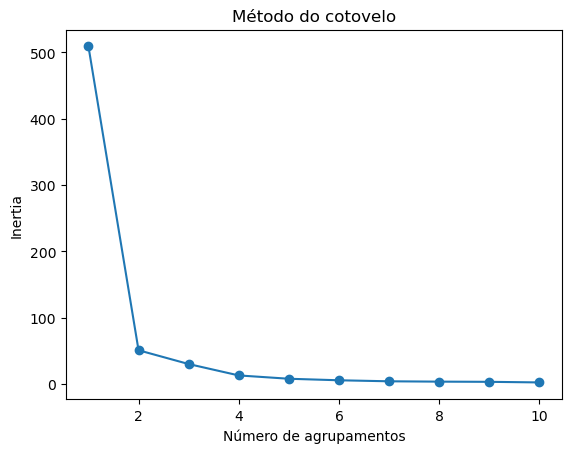

In [155]:
# Definindo o número ideal de clusters
data = df_norm
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Método do cotovelo')
plt.xlabel('Número de agrupamentos')
plt.ylabel('Inertia')
plt.show()

#### O gráfico do cotovelo acima nos informa que o número ideal de clusters é 2!

In [157]:
# Plotando os agrupamentos
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init=25)
kmeans.fit(df_norm)
y_kmeans = kmeans.predict(df_norm)

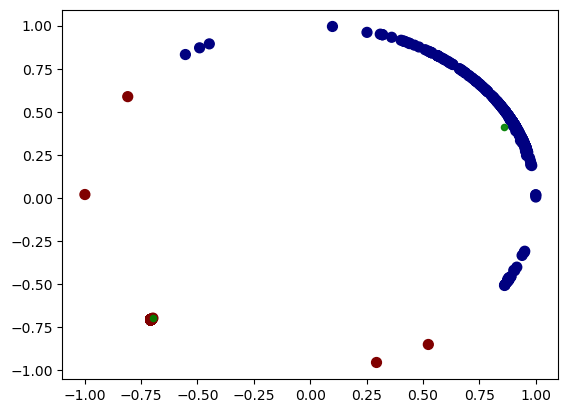

In [158]:
plt.scatter(df_norm[:, 169], df_norm[:, 172], c=y_kmeans, s=50, cmap='jet')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 169], centers[:, 172], c='green', s=20, alpha=0.9);
plt.show()

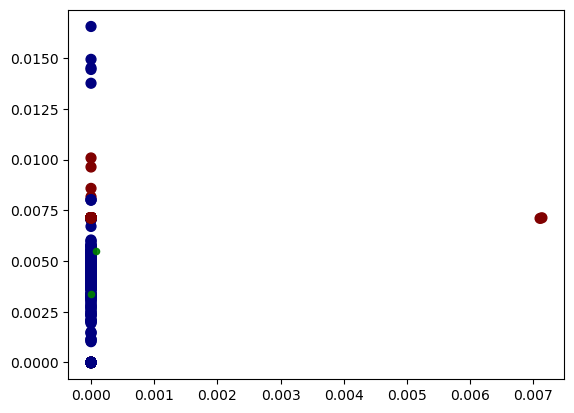

In [159]:
plt.scatter(df_norm[:, 165], df_norm[:, 167], c=y_kmeans, s=50, cmap='jet')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 165], centers[:, 167], c='green', s=20, alpha=0.9);
plt.show()

Os dois gráficos acima mostram a distribuição espacial dos grupos (nas cores vermelha e azul) e os centroides de cada grupo (na cor verde). 

In [161]:
# Incluindo a informação dos clusters no dataframe original
df_total['cluster'] = kmeans.labels_

# Imprimindo o dataframe original
print(df_total)

                 Agility  Accelerated Healing  Lantern Power Ring  \
A-Bomb                 0                    1                   0   
Abe Sapien             1                    1                   0   
Abin Sur               0                    0                   1   
Abomination            0                    1                   0   
Abraxas                0                    0                   0   
...                  ...                  ...                 ...   
Yellowjacket II        0                    0                   0   
Ymir                   0                    0                   0   
Yoda                   1                    0                   0   
Zatanna                0                    0                   0   
Zoom                   0                    0                   0   

                 Dimensional Awareness  Cold Resistance  Durability  Stealth  \
A-Bomb                               0                0           1        0   
Abe Sapien 

In [162]:
# Verificando os resultados e quantidades dos clusters no dataframe original
df_total['cluster'].value_counts()

cluster
0    491
1    169
Name: count, dtype: int64

## Questão 2
### Um dos desafios do clustering é definir o número certo de clusters. Como você escolheu esse número? Como você avalia a qualidade dos clusters finais?

O número de clusters foi definido através da regra do cotovelo, que resulta em um gráfico que simula para cada valor de "k" (grupos) o valor do quadrado da soma das distâncias euclidianas.
A qualidade dos agrupamentos pode ser obtida pelo cálculo da acurácia, sensitividade, especificidade e o valor do Kappa entre a segmentação da base de dados em grupo treino e teste.

# Identificando os bandidos
Nesta seção, lidaremos com o problema de aprendizagem supervisionada. Mais concretamente, iremos formular uma tarefa de classificação, e nosso alvo é o alinhamento dos super-heróis (bom ou mau).

## Questão 3
Primeiro, usaremos o algoritmo Naive Bayes. Execute o algoritmo nos dados dos super-heróis para prever a variável de alinhamento e avaliar os resultados. Novamente, detalhe qualquer pré-processamento e engenharia de recursos que você aplicou no processo.

1. Quais hipóteses assumimos ao usar o algoritmo Naive Bayes?
2. Como as características específicas deste conjunto de dados influenciam suas escolhas e resultados de modelagem?
3. Como você avalia os resultados?

### Naive Bayes
Naive Bayes é um algoritmo de classificação de aprendizado supervisionado baseado no Teorema de Bayes. É uma extensão do classificador Exact Bayes e assume que todas as variáveis são independentes umas das outras. Este método é adequado quando a dimensionalidade das entradas é alta. Ele usa um método simples de probabilidade condicional e pode ser computacionalmente barato para superar modelos mais sofisticados.

Thomas Bayes, foi pastor e matemático inglês do século XVIII (1702-1761).   

A **Estatística Bayesiana** é um campo dentro da estatística que nos permite atualizar nossas crenças com base em novas evidências.   

A estatística bayesiana envolve a idéia de que podemos começar com uma crença inicial (ou *a priori*) sobre um evento e, à medida que obtemos novos dados, atualizamos essa crença. Em outras palavras, não trabalhamos com uma única probabilidade fixa, mas sim com uma probabilidade que evolui à medida que novas informações são obtidas.   

**O que é o Teorema de Bayes?**   

Em sua essência, o **Teorema de Bayes** fornece uma maneira de atualizar as probabilidades à medida que obtemos novas informações. É a base da inferência estatística bayesiana, que trata os parâmetros como **variáveis aleatórias**, enquanto que a inferência clássica (ou frequentista) os considera como constantes.   

**Fórmula de Bayes**   

$$\huge P(A|B)=\frac{P(B|A) \times P(A)}{P(B)}$$


Onde:   

$P(A|B)$: É a probabilidade *a posteriori* de A, ou seja, a probabilidade de A ocorrer, dado que B ocorreu. Após receber novos dados, você atualiza sua crença inicial;   

$P(B|A)$: É a probabilidade de B ocorrer, dado que A ocorreu;   

$P(A)$: É a probabilidade *a priori* de A. Representa nossa crença inicial ou conhecimento sobre A antes de levar em consideração a nova informação B;   

$P(B)$: É a probabilidade total de B.

#### O dataframe utilizado será o "df_total", resultado da sequência de manipulação dos dados da questão 1:
- Leitura das duas bases de dados;
- Verificação de quais registros vazios em cada base;
- Os registros vazios que totalizaram até 10% do total dos registros foram substituidos pelo valor da moda (para variáveis qualitativas) ou pelo valor da mediana (para variáveis quantitativas);
- Aplicado o comando "merge" para unir as duas bases de dados.

#### 1. Hipóteses nulas do algoritmo Naive Bayes

$$H_0 : Não \ há \ dependência \ entre \ as \ variáveis \ da \ base \ de \ dados$$

$$H_0 : As \ variáveis \ não \ contribuem \ igualmente \ para \ o \ resultado$$

In [171]:
# Segmentando o dataframe "df_total" em dois arrays: "resp" com a variável resposta "Alignment" e "pred" com todas as variáveis preditoras
from sklearn.model_selection import train_test_split

resp = df_total['Alignment'].to_numpy()
df_total2 = df_total.drop(['Alignment', 'cluster'], axis=1)
pred = df_total2.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    pred, resp, test_size=0.30, random_state=125
)

In [172]:
df_total2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, A-Bomb to Zoom
Columns: 172 entries, Agility to Weight
dtypes: float64(2), int64(170)
memory usage: 892.0+ KB


In [173]:
from sklearn.naive_bayes import GaussianNB

# Construindo o classificador Gaussiano
modelo = GaussianNB()

# Trainamento do modelo
modelo.fit(X_train, y_train)

# Prevendo o resultado
predicted = modelo.predict([X_test[19]])

print("Actual Value:", y_test[19])
print("Predicted Value:", predicted[0])

Actual Value: 1
Predicted Value: 3


Os valores reais e previstos não são os mesmos.

### Avaliação do modelo

In [176]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Acuracia:", acuracia)
print("F1 Score:", f1)

Acuracia: 0.20202020202020202
F1 Score: 0.18571921888263485


O modelo teve um desempenho baixo.

### Visualização da matriz de confusão, para comparar os verdadeiros positivos e verdadeiros negativos

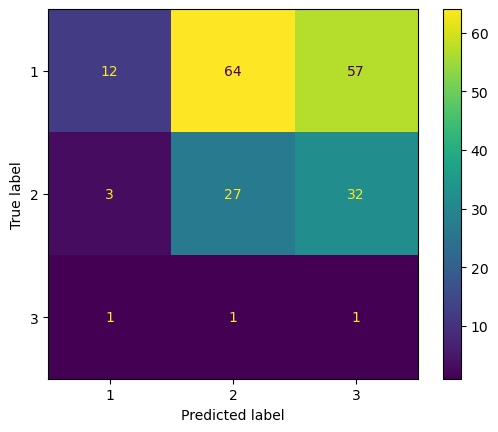

In [179]:
labels = [1,2,3]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#### O resultado da matriz de confusão acima nos informa sobre a variável resposta "Alingment":
- Na primeira linha: 12 resultados foram classificados corretamente como "Bom" (coluna 1), 64 resultados "Bom" foram classificados como "Mau" (coluna 2) e 57 resultados "Bom" foram classificados como "Neutro" (coluna 3);
- Na segunda linha: 3 resultados "Mau" foram classificados como "Bom" (coluna 1), 27 resultados "Mau" foram classificados corretamente (coluna 2) e 32 resultados "Mau" foram classificados como "Neutro" (coluna 3);
- Na terceira linha: 1 resultado "Neutro" foi classificados como "Bom" (coluna 1), 1 resultados "Neutro" foi classificado como "Mau" e 1 resultado "Neutro" foi classificado corretamente como "Neutro". 

#### 2. Como as características específicas deste conjunto de dados influenciam suas escolhas e resultados de modelagem?

A base de dados contém originalmente apenas duas variáveis quantitativas. A grande maioria das variáveis é qualitativa e isso influencia o resultado dos agrupamentos.

#### 3. Como você avalia os resultados?

Obviamente a acurácia do modelo preditivo resultou em um valor baixo (20,2%).

## Questão 4
#### Agora sinta-se à vontade para executar o algoritmo de classificação que julgar mais adequado para essa tarefa.
1. O que motivou sua escolha do algoritmo?
2. Como esse algoritmo se compara ao Naive Bayes em relação às suposições e resultados da modelagem?

#### 1. O que motivou sua escolha do algoritmo?

**Random Forest** combina a saída de várias **Árvores de Decisão** e, finalmente, cria sua própria saída. **Random Forest** funciona com o mesmo princípio que **Árvores de Decisão**; no entanto, ele não seleciona todos os pontos de dados e variáveis em cada uma das árvores. Ele amostra aleatoriamente pontos de dados e variáveis em cada uma das árvores que ele cria e, em seguida, combina a saída no final. Ele remove o viés que um modelo de **Árvore de Decisão** pode introduzir no sistema. Além disso, melhora significativamente o poder preditivo. Veremos isso na próxima seção quando pegarmos um conjunto de dados de amostra e compararmos a precisão de **Random Forest** com **Árvore de Decisão**.

In [188]:
# Modelagem
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [189]:
# Visualização da árvore
from sklearn.tree import export_graphviz
from IPython.display import Image

In [190]:
# Dividindo o dataframe em preditores (X) e resposta (y)
X = pred
y = resp

In [191]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [192]:
# Ajustando e avaliando o modelo Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [193]:
# Temos um modelo de floresta aleatória treinado, mas precisamos descobrir se ele faz previsões precisas
y_pred = rf.predict(X_test)

In [194]:
# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.7171717171717171


#### 2. Como esse algoritmo se compara ao Naive Bayes em relação às suposições e resultados da modelagem?

Note que o algoritmo Random Forest resultou valor bem maior de acurácia (65,15%) comparado ao Naive Bayes (20,20%).

# Além do bem e do mal
## Questão 5
#### Vamos transformar nosso problema em uma tarefa de regressão e tentar prever o peso dos super-heróis dados os outros recursos.
1. Qual algoritmo você escolheu e por quê?
2. Como você avalia o desempenho do seu algoritmo neste caso?

#### 1. Qual algoritmo você escolheu e por quê?
O algoritmo utilizado será a regressão não linear, porque a base de dados contém muitas variáveis dicotômicas (boolenas, dummy) que normalmente não são bem explicadas pela regressão linear. 

$$\hat{y} = \beta_0 + \beta_1 \times x_1 + \beta_1 \times x^2_1 + ... + \beta_d \times x^d_1 + \epsilon$$

#### Análise de correlação entre as variáveis

In [201]:
# Correlacionando as variáveis com a variável "Weight"
df_corr = df_total.corr()['Weight'].sort_values()

# Criando a tabela com os valores dos Coeficientes de correlação
df_coef = pd.DataFrame(data = df_corr)
df_coef 

Weight
cluster                -0.667863
Publisher              -0.319277
Darkforce Manipulation -0.088288
Omnipotent             -0.081391
Omniscient             -0.063436
...                          ...
Stamina                 0.245723
Super Strength          0.279967
Durability              0.293468
Height                  0.647030
Weight                  1.000000

[174 rows x 1 columns]

<Axes: >

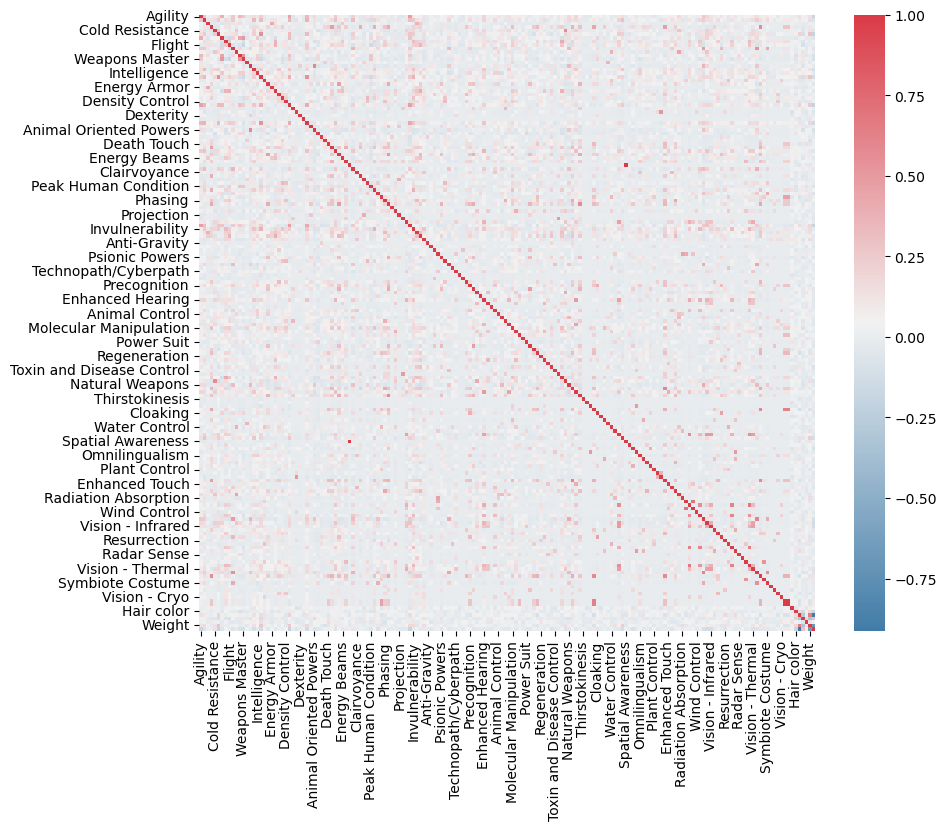

In [202]:
# Verificando quais variáveis estão fortemente correlacionadas
f, ax = plt.subplots(figsize=(10, 8))
corr = df_total.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

#### Modelo 1 - Regressor Floresta Aleatória

In [204]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()

# Treinando o modelo
clf.fit(X_train, y_train)

# Predição no dataset teste
predict = clf.predict(X_test)

In [205]:
from sklearn.metrics import mean_squared_error, r2_score
print('RMSE: %.4f' % np.sqrt(mean_squared_error(y_test, predict)))
print('r2 score: %.4f' % r2_score(y_test, predict))

RMSE: 0.5919
r2 score: 0.0207


#### 2. Como você avalia o desempenho do seu algoritmo neste caso?
O desempenho da regressão é avaliado pelo valor do Coeficiente de Determinação $R^2$ que informa quanto as variáveis preditoras são responsáveis pelo valor da variável resposta no modelo matemático. No modelo em questão, $R^2 = -0.0079$ que por apresentar sinal negativo, mostra que o modelo tem problemas e deve ser descartado.

# Análise
## Questão 6
#### Quais aspectos desse conjunto de dados apresentam problemas para agrupamento, classificação e regressão? Como você resolveu esses problemas?

O conjunto de dados original apresentava várias variáveis com muitos dados omitidos. Esse problema deve ser corrigido para conseguirmos realizar agrupamentos, classificações e regressões. Os valores omitidos que totalizarem até 10% do total dos registros foram substituidos pelo valor da moda (para variáveis qualitativas) ou pelo valor da mediana (para variáveis quantitativas). Nos casos em que os valores omitidos estavam em quantidades superiores a 10% da amostra foram excluidas da base de dados as variáveis correspondentes. O estudo de correlação não apresentou valores elevados para os coeficientes, portanto a princípio não há problemas de multicolinearidade dos dados na regressão.